In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px
import umap
from sklearn.preprocessing import StandardScaler

c:\_\jupyter_3\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
preprocessed_data_path = '../../20x_datasets/Preprocessed_data/'
nucleus_dataset_labels = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset.csv')
nucleus_dataset = nucleus_dataset_labels.drop('CellType', axis=1)
nucleus_dataset_m1 = nucleus_dataset_labels[nucleus_dataset_labels['CellType'] == 'M1'].drop(['CellType'], axis=1)
nucleus_dataset_m2 = nucleus_dataset_labels[nucleus_dataset_labels['CellType'] == 'M2'].drop(['CellType'], axis=1)
nucleus_dataset_nt = nucleus_dataset_labels[nucleus_dataset_labels['CellType'] == 'NT'].drop(['CellType'], axis=1)

In [3]:
scaler = StandardScaler()
nucleus_dataset_scaled = scaler.fit_transform(nucleus_dataset)

tsne = TSNE(n_components=2, random_state=0, perplexity=50, n_iter = 2000)
X_tsne = tsne.fit_transform(nucleus_dataset_scaled)

fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=nucleus_dataset_labels.CellType)
fig.update_layout(
    title="2D t-SNE visualization of nucleus data (CD86/P4G4)",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [4]:
nucleus_dataset_scaled_m1 = scaler.fit_transform(nucleus_dataset_m1)

tsne = TSNE(n_components=2, random_state=0, perplexity=50, n_iter = 2000)
X_tsne = tsne.fit_transform(nucleus_dataset_scaled_m1)

fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1])
fig.update_layout(
    title="2D t-SNE visualization of M1 nucleus data (CD86/Smooth)",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [5]:
nucleus_dataset_scaled_m2 = scaler.fit_transform(nucleus_dataset_m2)

tsne = TSNE(n_components=2, random_state=0, perplexity=50, n_iter = 2000)
X_tsne = tsne.fit_transform(nucleus_dataset_scaled_m2)

fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1])
fig.update_layout(
    title="2D t-SNE visualization of M2 nucleus data (CD86/Smooth)",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [6]:
nucleus_dataset_scaled_nt = scaler.fit_transform(nucleus_dataset_nt)

tsne = TSNE(n_components=2, random_state=0, perplexity=50, n_iter = 2000)
X_tsne = tsne.fit_transform(nucleus_dataset_scaled_nt)

fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1])
fig.update_layout(
    title="2D t-SNE visualization of NT nucleus data (CD86/Smooth)",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [7]:
nucleus_dataset_scaled = scaler.fit_transform(nucleus_dataset)

tsne = TSNE(n_components=3, random_state=0, perplexity=30, n_iter = 2000)
X_tsne = tsne.fit_transform(nucleus_dataset_scaled)

fig = px.scatter_3d(x=X_tsne[:, 0],
                    y=X_tsne[:, 1],
                    z=X_tsne[:, 2],
                    color=nucleus_dataset_labels.CellType,
                    labels={'color': 'CellType'})

fig.update_traces()
fig.update_layout(title_text='3D t-SNE visualization of nucleus data (CD86/P4G4)')
fig.show()

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [8]:
perplexity = [5, 10, 20, 30, 40, 50]
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(nucleus_dataset)
    divergence.append(model.kl_divergence_)
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

c:\_\jupyter_3\venv\lib\site-packages\sklearn\manifold\_t_sn

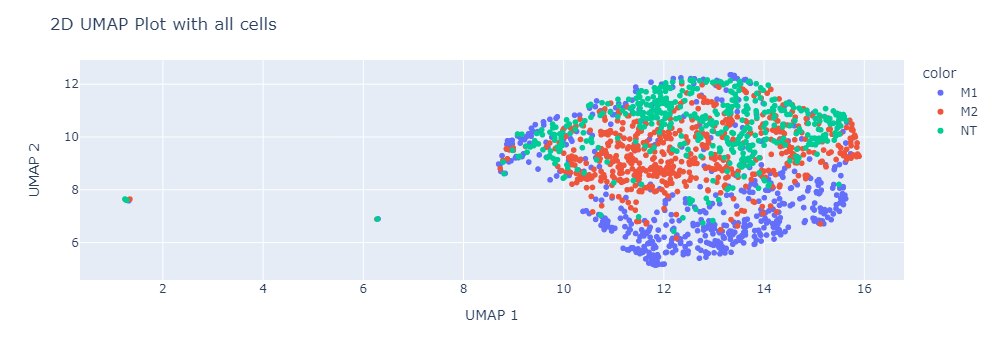

In [9]:
umap_model = umap.UMAP(random_state=0)
projections = umap_model.fit_transform(nucleus_dataset_scaled)
projections_nucleus_dataset = pd.DataFrame(projections, columns=['UMAP_X', 'UMAP_Y'])

fig = px.scatter(projections_nucleus_dataset, x='UMAP_X', y='UMAP_Y', color=nucleus_dataset_labels.CellType)
fig.update_xaxes(title_text='UMAP 1')
fig.update_yaxes(title_text='UMAP 2')
fig.update_layout(title_text='2D UMAP Plot with all cells')

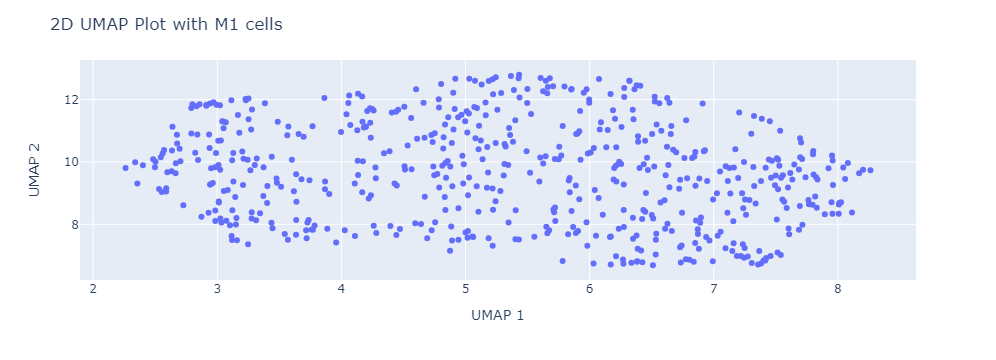

In [10]:
umap_model = umap.UMAP(random_state=0)
projections = umap_model.fit_transform(nucleus_dataset_scaled_m1)

projections_nucleus_dataset = pd.DataFrame(projections, columns=['UMAP_X', 'UMAP_Y'])
fig = px.scatter(projections_nucleus_dataset, x='UMAP_X', y='UMAP_Y')
fig.update_xaxes(title_text='UMAP 1')
fig.update_yaxes(title_text='UMAP 2')
fig.update_layout(title_text='2D UMAP Plot with M1 cells')

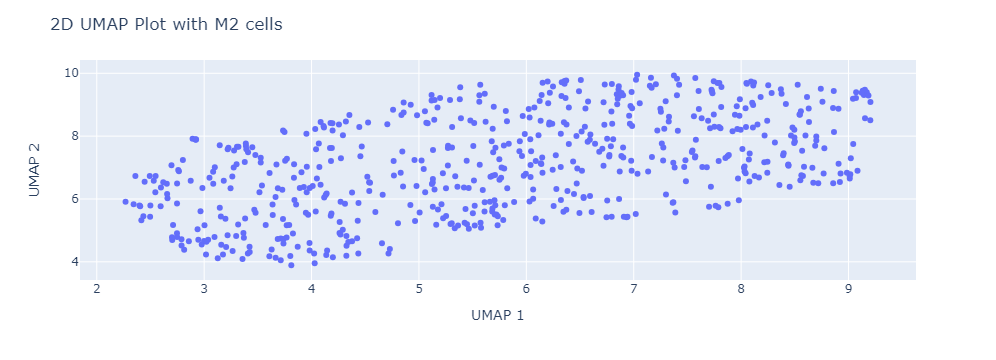

In [11]:
umap_model = umap.UMAP(random_state=0)
projections = umap_model.fit_transform(nucleus_dataset_scaled_m2)

projections_nucleus_dataset = pd.DataFrame(projections, columns=['UMAP_X', 'UMAP_Y'])
fig = px.scatter(projections_nucleus_dataset, x='UMAP_X', y='UMAP_Y')
fig.update_xaxes(title_text='UMAP 1')
fig.update_yaxes(title_text='UMAP 2')
fig.update_layout(title_text='2D UMAP Plot with M2 cells')

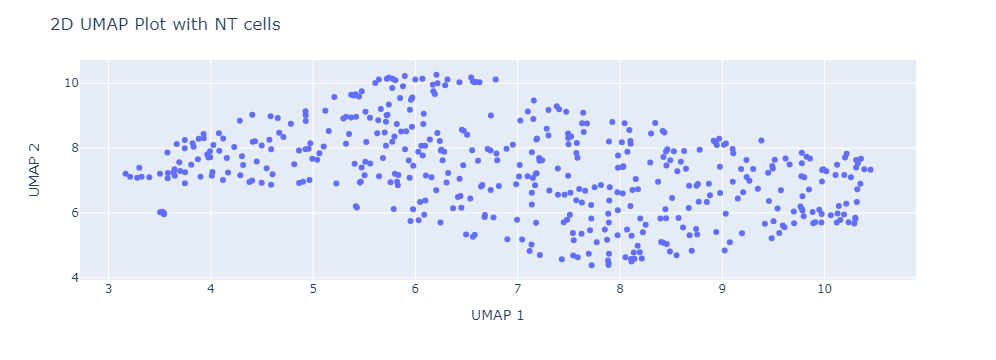

In [12]:
umap_model = umap.UMAP(random_state=0)
projections = umap_model.fit_transform(nucleus_dataset_scaled_nt)

projections_nucleus_dataset = pd.DataFrame(projections, columns=['UMAP_X', 'UMAP_Y'])
fig = px.scatter(projections_nucleus_dataset, x='UMAP_X', y='UMAP_Y')
fig.update_xaxes(title_text='UMAP 1')
fig.update_yaxes(title_text='UMAP 2')
fig.update_layout(title_text='2D UMAP Plot with NT cells')